In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from keras.datasets import cifar100
import tensorflow as tf
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import time
# from skimage.transform import resize
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
c:\users\ketan\anaconda3\envs\cnn2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\ketan\anaconda3\envs\cnn2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\ketan\anaconda3\envs\cnn2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\ketan\anaconda3\envs\cnn2\lib\site-packag

In [2]:
# ! pip install matplotlib

In [3]:
num_classes = 20
nb_epochs = 7

In [4]:
from keras.models import load_model

Pretrained model

In [ ]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet_model.layers:
#     if isinstance(layer, BatchNormalization):
#         layer.trainable = True
#     else:
        layer.trainable = False

model = Sequential()
model.add(UpSampling2D())
model.add(UpSampling2D())
model.add(UpSampling2D())
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.25))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
# model.summary()

In [ ]:
# ## Initialize CNN
# classifier = Sequential()
# ## Here what we did is created the pipeline for the CNN and forward NN 
# ## so here first Cnn network responsible to find out the kernals and forward network try to find out the realtion .

In [72]:
# ## step 1 Convolution 
# classifier.add(Conv2D(50,(3,3),input_shape=(64,64,3,),activation='relu',padding='same'))
# ## here we add our first CNN layer of Conv2d in first layer we have 32 kernals to learn different features of size 3*3
# ## here it try to learn that 32 kernals.

In [73]:
# ## step 2 Pooling
# classifier.add(MaxPooling2D(pool_size=(2,2)))
# ## added pooling layer to reduce the number of the data and take the features with the max value.
# ## Its not mendatory to appy the pooling after first layer 
# ## Adding some more layers
# classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3,),activation='relu'))
# classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3,),activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(2,2)))


In [74]:
# ## step 3 flattening
# classifier.add(Flatten())
# ## Flatten all the data to pass the next layer .

In [75]:
# ## step 5 Full connection 
# classifier.add(Dense(units=128,activation='relu'))
# classifier.add(Dense(units=80,activation='relu'))
# classifier.add(Dense(units=64,activation='relu'))
# ## Here is dense we are trying to add hidden layer as in ANN

In [76]:
# classifier.add(Dense(units=7,activation='softmax'))
# ## Add final output layer . Here we used sigmoid for binary class classification
# ## till now our pipeline is ready 

In [77]:
# ## Compile the CNN
# classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Self Resnet

In [5]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
# import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [6]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network

    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    ### START CODE HERE ###

    # Second component of main path (≈3 lines)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    ### END CODE HERE ###

    return X

In [7]:
def convolutional_block(X, f, filters, stage, block, s=2):
    """
    Implementation of the convolutional block as defined in Figure 4

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used

    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    ### START CODE HERE ###

    # Second component of main path (≈3 lines)
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    ### END CODE HERE ###
    return X

In [8]:
def ResNet50(input_shape=(64, 64, 3), classes=7):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 60], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 60], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 60], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f=3, filters=[128, 128, 50], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 50], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 50], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 50], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f=3, filters=[256, 256, 24], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 24], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 24], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 24], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 24], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 24], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = X = convolutional_block(X, f=3, filters=[512, 512, 48], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 48], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 48], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [13]:
def ResNet50(input_shape=(64, 64, 3), classes=6):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [9]:
model = ResNet50(input_shape=(64, 64, 3), classes=7)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# model.fit(X_train, Y_train, epochs = 2, batch_size = 32)

In [14]:
# preds = model.evaluate(X_test, Y_test)
# print("Loss = " + str(preds[0]))
# print("Test Accuracy = " + str(preds[1]))

In [15]:
## part 2 fitting the CNN to Images 

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
## here we normalize all the data to reduce values for faster calculation

In [12]:
training_set = train_datagen.flow_from_directory(r'C:\Users\ketan\Desktop\Ineuron\DL\Mypractive_notes\Multiclass\Train',
                                                 target_size = (64, 64,),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(r'C:\Users\ketan\Desktop\Ineuron\DL\Mypractive_notes\Multiclass\Train',
                                            target_size = (64, 64,),
                                            batch_size = 10,
                                            class_mode = 'categorical')
## in class_mode = 'categorical' we used categorical because we have multiple classes only 
## we get the data and it automatically identify the classes by folders we crated in the dataset directory
## here batch size is 32 it means we pass 32 pixels as a time and this batching will happen when we flatten the datset 
## after all the CNN layer 

Found 213 images belonging to 7 classes.
Found 213 images belonging to 7 classes.


In [ ]:
model1=model.fit_generator(training_set,
                        steps_per_epoch=70,
                        epochs = 5,
                        validation_data=test_set,
                        validation_steps = 10)
## here we fit the model with in each step how many epochs and validation in 100 steps of epoch


Epoch 1/5
 2/70 [..............................] - ETA: 6:18 - loss: 3.3523 - accuracy: 0.2000 

In [34]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_9 (ZeroPadding2D (None, 70, 70, 3)    0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        zero_padding2d_9[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [24]:
model.evaluate(test_set)

22/22 [==============================] - 5s 211ms/step


[3.367624521255493, 0.9671361446380615]

In [80]:
classifier.save('mclass1.h5')
print('Saved')
## here we create h5 file to get the model file for deployment 

Saved


In [25]:
model.save('mclass1.h5')
print('Saved')

Saved


Here after that you can visualize the model in netron . if you want to see the filters which get trained you can see in netron in inputs->kernal and expand that and even you can convert thar kernals into images by foolowing procdure : 1. save the kernal values by clicking the icon of save .2.and read npy file with below code 

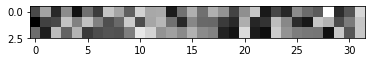

In [67]:
import numpy as np
from matplotlib import pyplot as plt
arr=np.load('conv2d_6_kernel_0.npy')
plt.imshow(arr[0][1],cmap='gray')

In [13]:
training_set.class_indices
## to get the classes used in training  set useful for get predictions

{'Cat': 0,
 'Dog': 1,
 'apple': 2,
 'bajra': 3,
 'farming_tools': 4,
 'pipes': 5,
 'wheat': 6}

In [26]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('jpg_13.jpg', target_size = (64, 64))
model1=load_model('mclass1.h5')
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model1.predict(test_image)
print(training_set.class_indices)
if result[0][0] == 1:
    prediction = 'Cat'
    print(prediction)
elif result[0][1] == 1:
    prediction = 'Dog'
    print(prediction)
elif result[0][2] == 1:
    prediction = 'Apple'
    print(prediction)    
elif result[0][3] == 1:
    prediction = 'Bajra'
    print(prediction)
elif result[0][4] == 1:
    prediction = 'farming_tools'
    print(prediction)
elif result[0][5] == 1:
    prediction = 'pipes'
    print(prediction)    
else:
    prediction = 'wheat'
    print(prediction)
print(result)

FileNotFoundError: [Errno 2] No such file or directory: 'jpg_13.jpg'

AttributeError: module 'tensorflow' has no attribute 'ConfigProto'